<h1 style="font-size:35px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">The Boston House Price Prediction</span></h1>
<hr>


For this project we will investigate the Boston House Price dataset.  
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are defined as follows:
    1. CRIM: per capita crime rate by town
    2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS: proportion of non-retail business acres per town
    4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX: nitric oxides concentration (parts per 10 million) 1 
    6. RM: average number of rooms per dwelling
    7. AGE: proportion of owner-occupied units built prior to 1940 
    8. DIS: weighted distances to five Boston employment centers 
    9. RAD: index of accessibility to radial highways
    10. TAX: full-value property-tax rate per 10000 
    11. PTRATIO: pupil-teacher ratio by town
    12. B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town 
    13. LSTAT: % lower status of the population
    14. MEDV: Median value of owner-occupied homes in $1000s

## 1. Prepare Probem

Let’s start off by loading the libraries required for this project.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

Next, we load the dataset and specify the short names for each attribute so that we can reference them explicitly later.

In [2]:
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing = pd.read_csv(filename, delim_whitespace=True, names=names)

<hr style="border-color:royalblue;background-color:royalblue;height:0.1px;">

## 2. Summarize the Dataset
### 2.1. Statistical Summary
We can confirm the dimension of our loaded data and look at the data types of each attribute.

In [3]:
print ('Dimension: ', housing.shape)

Dimension:  (506, 14)


In [4]:
print ('Types of each attribute: \n', housing.dtypes)

Types of each attribute: 
 CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


Take a peek at the first 20 rows of the data.

In [5]:
print (housing.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396

Let’s summarize the distribution of each attribute.

In [6]:
pd.set_option('precision', 3)
print(housing.describe())

          CRIM       ZN    INDUS     CHAS      NOX       RM      AGE      DIS  \
count  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000   
mean     3.614   11.364   11.137    0.069    0.555    6.285   68.575    3.795   
std      8.602   23.322    6.860    0.254    0.116    0.703   28.149    2.106   
min      0.006    0.000    0.460    0.000    0.385    3.561    2.900    1.130   
25%      0.082    0.000    5.190    0.000    0.449    5.886   45.025    2.100   
50%      0.257    0.000    9.690    0.000    0.538    6.208   77.500    3.207   
75%      3.677   12.500   18.100    0.000    0.624    6.623   94.075    5.188   
max     88.976  100.000   27.740    1.000    0.871    8.780  100.000   12.127   

           RAD      TAX  PTRATIO        B    LSTAT     MEDV  
count  506.000  506.000  506.000  506.000  506.000  506.000  
mean     9.549  408.237   18.456  356.674   12.653   22.533  
std      8.707  168.537    2.165   91.295    7.141    9.197  
min      1.000  187.00

### 2.2. Data Visualization

Let’s look at histograms of each attribute to get a sense of the data distributions.

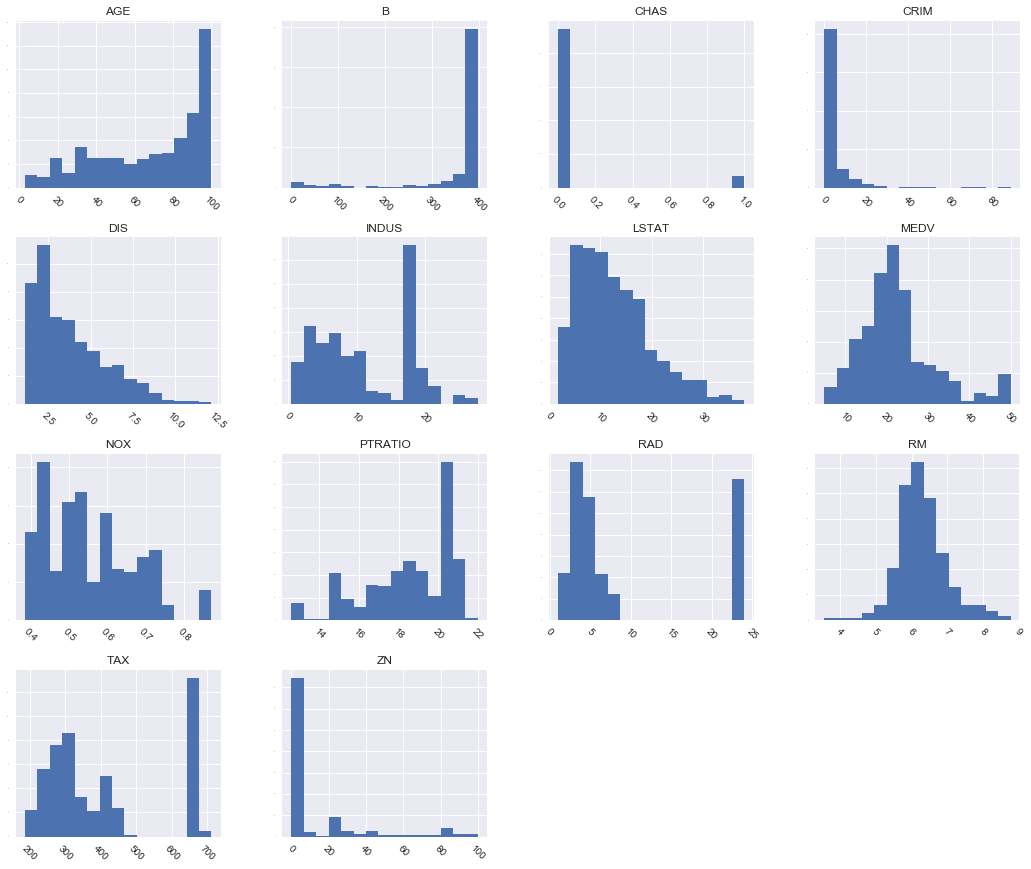

In [7]:
housing.hist(figsize = (18, 15),xrot = -45, ylabelsize=1, bins=15)
plt.show()

The distributions of B, CRIM, AGE, and ZN are exponential. RAD and TAX  have a bimodal distribution.  
It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which might be helpful later with transforms.

Then, look at scatter plots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

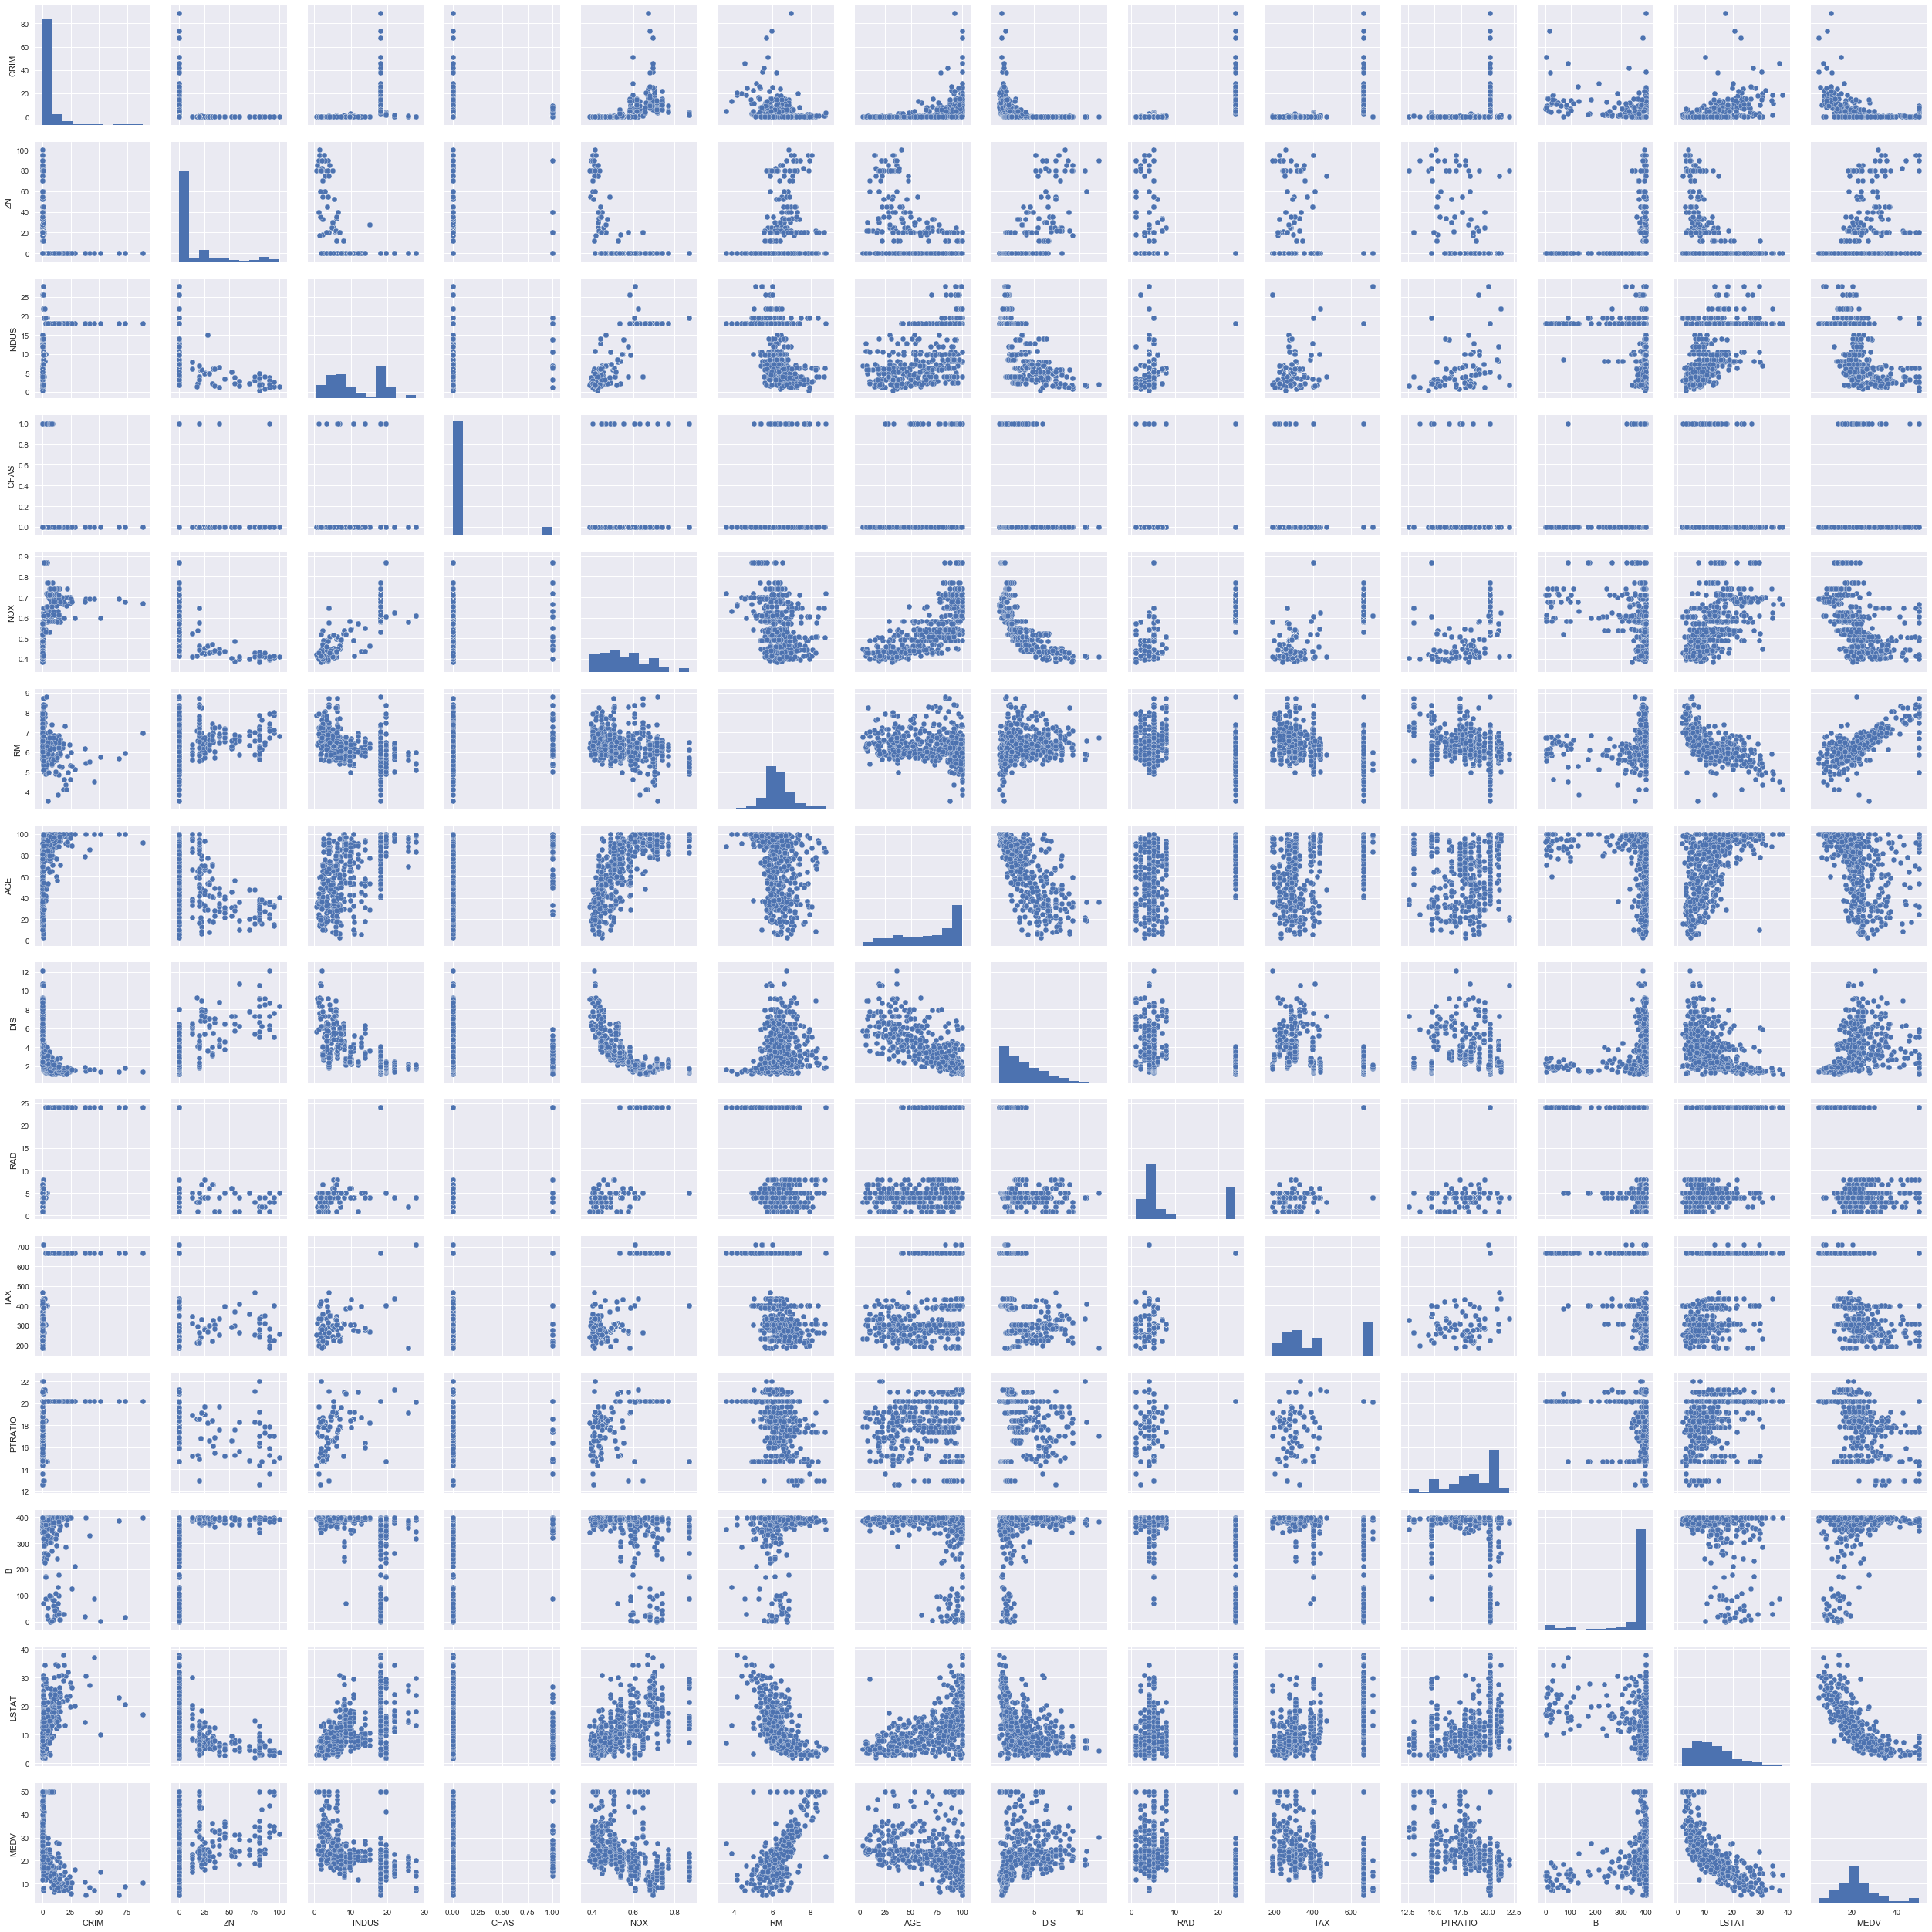

In [8]:
plt.figure(figsize=(18,18))
sns.pairplot(housing)
plt.show()

We can see that some of the higher correlated attributes do show a good structure in their relationship. They are not linear, but good predictable curved relationships.

We also visualize the correlations between the attributes. The dark red color shows positive correlation whereas the dark blue color shows negative correlation.  We can also see some dark red and dark blue that suggest candidates for removal to better improve accuracy of models later on.

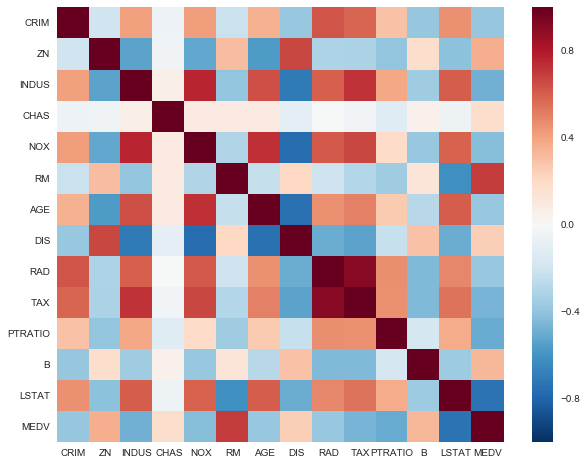

In [9]:
plt.figure(figsize=(10,8))
corr = housing.corr()
sns.heatmap(corr)
plt.show()

<hr style="border-color:royalblue;background-color:royalblue;height:0.1px;">

## 3. Prepare Data

<hr style="border-color:royalblue;background-color:royalblue;height:0.1px;">

## 4. Evaluate Algorithms
### 4.1. Validation Dataset
We will use 80% of the dataset for modeling and hold back 20% for validation.

In [10]:
array = housing.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
                                                                test_size=validation_size, 
                                                                random_state=seed)

### 4.2. Baseline

We have no idea what algorithms will do well on this problem. Gut feel suggests regression algorithms like Linear Regression and ElasticNet may do well.  
It is also possible that decision trees and even SVM may do well. I have no idea. Let’s design our test harness.  
We will use 10-fold cross-validation. The dataset is not too small, and this is a good standard test harness configuration.  
We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [11]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

Let’s create a baseline of performance on this problem and spot-check some different algorithms. 
We will select a suite of different algorithms capable of working on this regression problem. The algorithms selected include:  
- Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN). 
- Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

In [12]:
# Spot-Check Algorithms
models = [('LR', LinearRegression()), 
          ('LASSO', Lasso()), 
          ('EN', ElasticNet()), 
          ('KNN', KNeighborsRegressor()), 
          ('CART', DecisionTreeRegressor()),
          ('SVR', SVR())]

The algorithms all use default tuning parameters. Let’s compare the algorithms.  
We will display the mean and standard deviation of MSE for each algorithm as we calculate it and collect the results for use later.

In [13]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -27.144780 (11.055875)
SVR: -85.518342 (31.994798)


Let’s take a look at the distribution of scores across all cross validation folds by algorithm.  
We can see similar distributions for the regression algorithms and perhaps a tighter distribution of scores for CART.

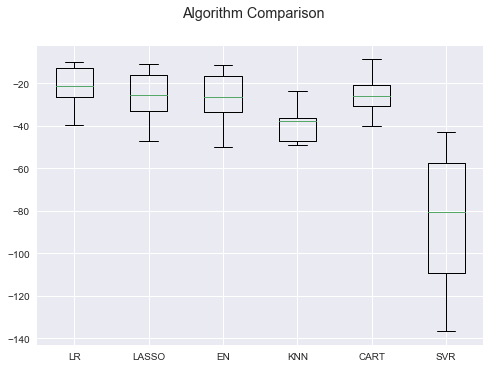

In [14]:
# Compare Algorithms
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

The differing scales of the data is probably hurting the skill of all of the algorithms and perhaps more so for SVR and KNN. In the next section, we will look at running the same algorithms using a standardized copy of the data.

### 4.4. Evaluate Algorithms: Standardization
We suspect that the differing scales of the raw data may be negatively impacting the skill of some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the dataset.  
Here, the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. We also need to avoid data leakage when we transform the data. A good way to prevent leakage is to use pipelines that standardize the data and build the model for each fold in the cross-validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [15]:
# Standardize the dataset
pipelines = {
    'ScaledLR': Pipeline([('Scaler', StandardScaler()), ('LR',LinearRegression())]),
    'ScaledLASSO': Pipeline([('Scaler', StandardScaler()), ('LASSO',Lasso())]),
    'ScaledEN': Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())]),
    'ScaledKNN': Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())]),
    'ScaledCART': Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())]),
    'ScaledSVR': Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])
}

Running the example provides a list of mean squared errors. We can see that scaling did affect KNN, driving the error lower than the other models.

In [16]:
results = []
for name, model in pipelines.items():
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -22.941102 (10.963627)
ScaledSVR: -29.633086 (17.009186)


 Let’s take a look at the distribution of the scores across the cross validation folds.

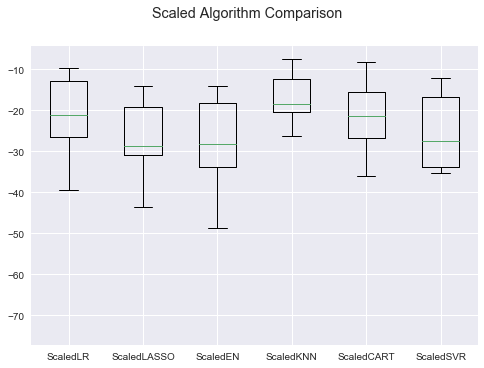

In [17]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(pipelines.keys())
plt.show()

We can see that KNN has both a tight distribution of error and has the lowest score.

<hr style="border-color:royalblue;background-color:royalblue;height:0.1px;">

## 5. Improve Accuracy
### 5.1. Algorithm Tuning

We know from the results in the previous section that KNN achieves good results on a scaled version of the dataset, but whether it does better. The default value for the number of neighbors in KNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score.  
Try odd k values from 1 to 21, an arbitrary range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross-validation on a standardized copy of the training dataset.

In [18]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

We can display the mean and standard deviation scores as well as the best performing value

In [19]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


You can see that the best for k (n neighbors) is 3 providing a mean squared error of -18.172137, the best so far.

### 5.2. Ensemble

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. 
In this section, we will evaluate four different ensemble machine learning algorithms.  
- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).   
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).  

We will use the same test harness as before, 10-fold cross validation and pipelines that standardize the training data for each fold.

In [20]:
ensembles = {
    'ScaledAB': Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())]),
    'ScaledGBM': Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())]),
    'ScaledRF': Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())]),
    'ScaledET': Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])
}

Running the example calculates the mean squared error for each method using the default parameters.  
We can see that we’re getting better scores than our linear and nonlinear algorithms in previous sections.

In [21]:
results = []
for name, model in ensembles.items():
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: -15.003757 (6.639854)
ScaledGBM: -10.139122 (4.506366)
ScaledRF: -12.603103 (6.990324)
ScaledET: -10.048020 (6.026421)


We can also plot the distribution of scores across the cross validation folds

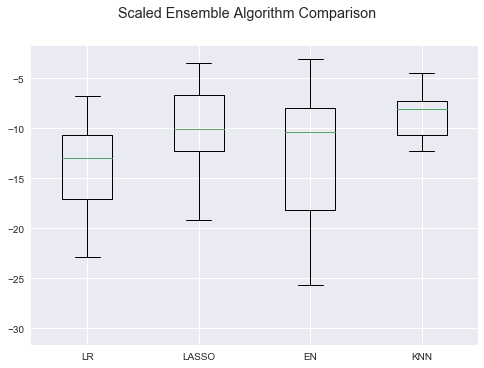

In [22]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It looks like Gradient Boosting has a better mean score, it also seems Extra Trees has a similar distribution and perhaps a better median score.  
####  Tune Ensemble Methods
The default number of boosting stages to perform (n estimators) is 100. That is a good candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting stages, the better the performance, but the longer the training time.  
In this section, we will look at tuning the number of stages for gradient boosting. Below we define a parameter grid n estimators values from 50 to 400 in increments of 50. Each setting parameter is evaluated using 10-fold cross-validation.

In [23]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

As before, we can summarize the best configuration and get an idea of how performance changed with each different configuration.

In [24]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.356471 using {'n_estimators': 400}
-10.812167 (4.724394) with: {'n_estimators': 50}
-10.040857 (4.441758) with: {'n_estimators': 100}
-9.694096 (4.275762) with: {'n_estimators': 150}
-9.539706 (4.270637) with: {'n_estimators': 200}
-9.448764 (4.262603) with: {'n_estimators': 250}
-9.429946 (4.273791) with: {'n_estimators': 300}
-9.369824 (4.254108) with: {'n_estimators': 350}
-9.356471 (4.267837) with: {'n_estimators': 400}


We can see that the best configuration was n_estimators=400 resulting in a mean squared error of -9.356471, about 0.65 units better than the untuned method.  
Now we can finalize the model and prepare it for general use. 

<hr style="border-color:royalblue;background-color:royalblue;height:0.1px;">

## 6. Finalized Model

We will finalize the gradient boosting model and evaluate it on our holdout validation dataset.  
First, we need to prepare the model and train it on the entire training dataset. It includes standardizing the training dataset before training. We can also scale the inputs for the validation dataset and generate predictions.

In [25]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.8752520792


We can see that the estimated mean squared error is 11.8, close to our estimate of -9.3.

<hr style="border-color:royalblue;background-color:royalblue;height:0.1px;">